In [1]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.bn_vs_bn as bnvsbn
from pyAgrum.lib import image

In [2]:
colors = {'Smoking': 0.1, 'LungDisease': 0.2, 'Cold': 0.5, 'Cough': 0.95} #'d': 0.95, 

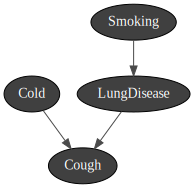

In [3]:
bn = gum.fastBN("Smoking->LungDisease->Cough<-Cold")

bn.cpt("Smoking")[:]=[0.6,0.4]
bn.cpt("Cold")[:]=[0.7,0.3]
bn.cpt("LungDisease")[{"Smoking":0}]=[0.9,0.1]
bn.cpt("LungDisease")[{"Smoking":1}]=[0.7,0.3]
bn.cpt("Cough")[{"LungDisease": 0, "Cold": 0}] = [0.9, 0.1]
bn.cpt("Cough")[{"LungDisease": 1, "Cold": 0}] = [0.8, 0.2]
bn.cpt("Cough")[{"LungDisease": 0, "Cold": 1}] = [0.7, 0.3]
bn.cpt("Cough")[{"LungDisease": 1, "Cold": 1}] = [0.3, 0.7]

gnb.show(bn)
image.export(bn,"Figs/cough_bn.png", nodeColor=colors)

In [5]:
gnb.flow.row(bn.cpt("Smoking"),bn.cpt("LungDisease"),bn.cpt("Cold"),bn.cpt("Cough"))

In [16]:
all_colors = {'Smoking.0': 0.1, 'LungDisease.0': 0.2, 'Cold.0': 0.5, 'Cough.0': 0.95,'Smoking.1': 0.1, 'LungDisease.1': 0.2, 'Cold.1': 0.5, 'Cough.1': 0.95}

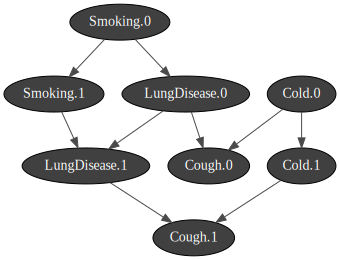

In [18]:
dbn = gum.fastBN("Smoking.0->LungDisease.0->Cough.0<-Cold.0;Smoking.1->LungDisease.1->Cough.1<-Cold.1;Smoking.0->Smoking.1;LungDisease.0->LungDisease.1;Cold.0->Cold.1")

dbn.cpt("Smoking.0")[:]=[0.6,0.4]
dbn.cpt("Cold.0")[:]=[0.7,0.3]
dbn.cpt("LungDisease.0")[{"Smoking.0":0}]=[0.9,0.1]
dbn.cpt("LungDisease.0")[{"Smoking.0":1}]=[0.7,0.3]
dbn.cpt("Cough.0")[{"LungDisease.0": 0, "Cold.0": 0}] = [0.9, 0.1]
dbn.cpt("Cough.0")[{"LungDisease.0": 1, "Cold.0": 0}] = [0.8, 0.2]
dbn.cpt("Cough.0")[{"LungDisease.0": 0, "Cold.0": 1}] = [0.7, 0.3]
dbn.cpt("Cough.0")[{"LungDisease.0": 1, "Cold.0": 1}] = [0.3, 0.7]

gnb.show(dbn)
image.export(dbn,"Figs/cough_dbn.png", nodeColor=all_colors)

In [15]:
gnb.show(dbn.cpt("Cough.1"))

# DAG

In [3]:
bn = gum.fastBN("e_1->e_2->e_1")

bn.cpt("Smoking")[:]=[0.6,0.4]
bn.cpt("Cold")[:]=[0.7,0.3]
bn.cpt("LungDisease")[{"Smoking":0}]=[0.9,0.1]
bn.cpt("LungDisease")[{"Smoking":1}]=[0.7,0.3]
bn.cpt("Cough")[{"LungDisease": 0, "Cold": 0}] = [0.9, 0.1]
bn.cpt("Cough")[{"LungDisease": 1, "Cold": 0}] = [0.8, 0.2]
bn.cpt("Cough")[{"LungDisease": 0, "Cold": 1}] = [0.7, 0.3]
bn.cpt("Cough")[{"LungDisease": 1, "Cold": 1}] = [0.3, 0.7]

gnb.show(bn)
image.export(bn,"Figs/cyclic.pdf", nodeColor=colors)

InvalidDirectedCycle: [pyAgrum] Directed cycle detected: Add a directed cycle in a dag !

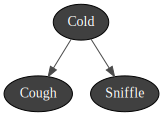

In [2]:
bn = gum.fastBN("Cold->Sniffle;Cold->Cough")

bn.cpt("Cold")[:]=[0.7,0.3]
bn.cpt("Sniffle")[{"Cold":0}]=[0.6,0.4]
bn.cpt("Sniffle")[{"Cold":1}]=[0.2,0.8]
bn.cpt("Cough")[{"Cold":0}]=[0.7,0.3]
bn.cpt("Cough")[{"Cold":1}]=[0.4,0.6]

gnb.show(bn)

In [5]:
ie=gum.LazyPropagation(bn)
ie.addJointTarget({"Cold","Cough","Sniffle"})
ie.makeInference()
gnb.show(ie.jointPosterior({"Cold","Cough","Sniffle"}))